In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler

# load data from csv file

In [100]:
df = pd.read_csv("projectt_3.csv")
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# preprocessing

In [101]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

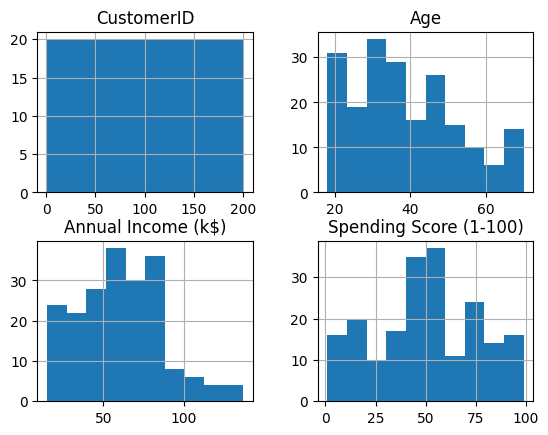

In [102]:
df.hist()
plt.show()

In [103]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

In [104]:
df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [105]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [106]:
df['Annual Income (k$)'].value_counts()

Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

In [107]:
df.shape

(200, 5)

In [108]:
df.dropna()
df.shape

(200, 5)

In [109]:
df.shape

(200, 5)

# normalization

In [110]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

#### Display the scatter plot of the randomly generated data.

Text(0, 0.5, 'Spending Score')

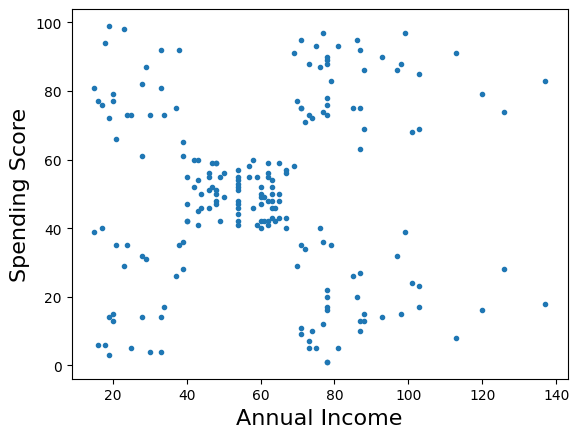

In [111]:
plt.scatter(X[:, 2], X[:, 3], marker='.')
plt.xlabel('Annual Income', fontsize=16)
plt.ylabel('Spending Score', fontsize=16)


Text(0, 0.5, 'Age ')

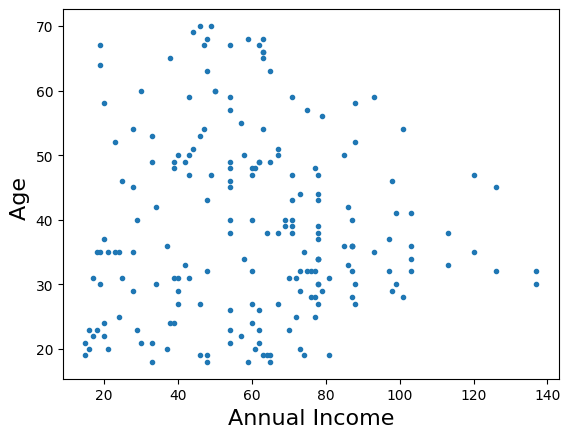

In [112]:
plt.scatter(X[:, 2], X[:, 1], marker='.')
plt.xlabel('Annual Income', fontsize=16)
plt.ylabel('Age ', fontsize=16)


Text(0, 0.5, 'Gender ')

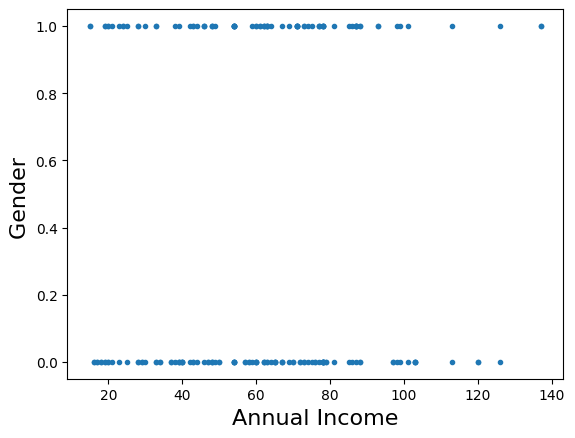

In [113]:
plt.scatter(X[:, 2], X[:, 0], marker='.')
plt.xlabel('Annual Income', fontsize=16)
plt.ylabel('Gender ', fontsize=16)

Text(0, 0.5, 'Spending Score ')

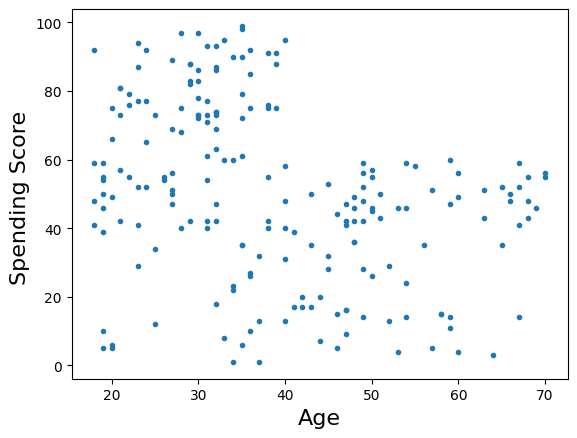

In [114]:
plt.scatter(X[:, 1], X[:, 3], marker='.')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Spending Score ', fontsize=16)

Text(0, 0.5, 'Gender ')

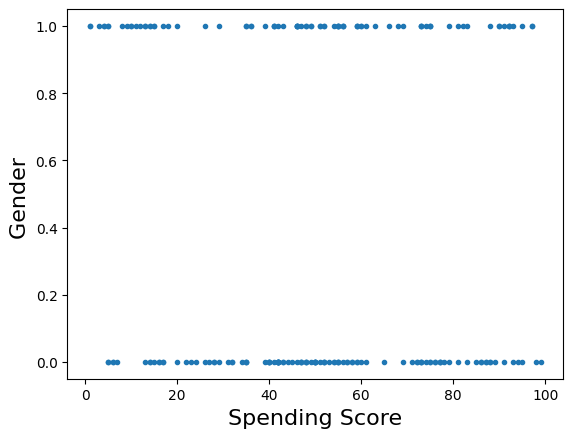

In [115]:
plt.scatter(X[:, 3], X[:, 0], marker='.')
plt.xlabel('Spending Score', fontsize=16)
plt.ylabel('Gender ', fontsize=16)

# k-means modeling

In [116]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 16)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[0 0 2 1 2 1 2 1 4 1 4 1 2 1 4 0 2 0 4 1 4 0 2 0 2 0 2 0 2 1 4 1 4 0 2 1 2
 1 2 1 2 0 4 1 2 1 2 1 1 1 2 0 1 4 2 4 2 4 1 4 4 0 2 2 4 0 2 2 0 1 4 2 2 2
 4 0 2 4 1 2 4 0 4 2 1 4 2 1 1 2 2 0 4 2 1 0 2 1 4 0 1 2 4 0 4 1 2 4 4 4 4
 1 2 0 1 1 2 2 2 2 0 2 1 0 1 1 4 0 4 0 3 0 1 1 3 1 2 0 3 1 2 0 1 1 3 0 4 1
 3 0 3 0 2 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 0 3 0 3 1 3 0 3 0 3 1 3 1 3
 0 3 0 3 1 3 1 3 1 3 1 3 0 3 0]


## Insights
#### We assign the labels to each row in dataframe.

In [117]:
df["Clus_km"] = labels
df.head(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Clus_km  
0        0  
1        0  
2        2  
3        1  
4        2

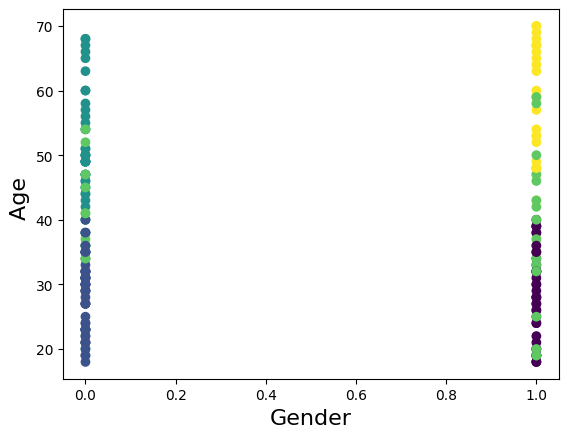

In [118]:
x= df['Gender']
y= df['Age']
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Age ', fontsize=16)
plt.scatter(x,y,c=k_means.labels_)

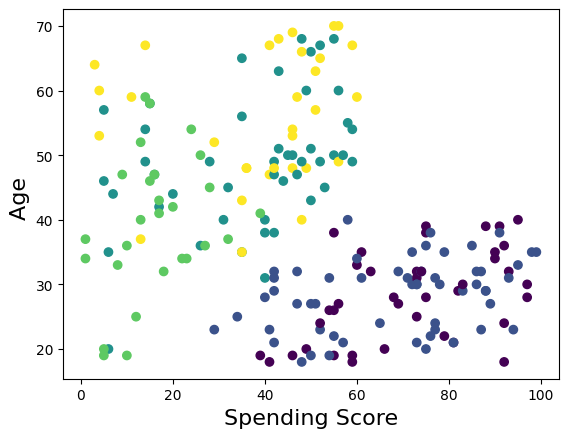

In [119]:
x= df['Spending Score (1-100)']
y= df['Age']
plt.xlabel('Spending Score', fontsize=16)
plt.ylabel('Age ', fontsize=16)
plt.scatter(x,y,c=k_means.labels_)

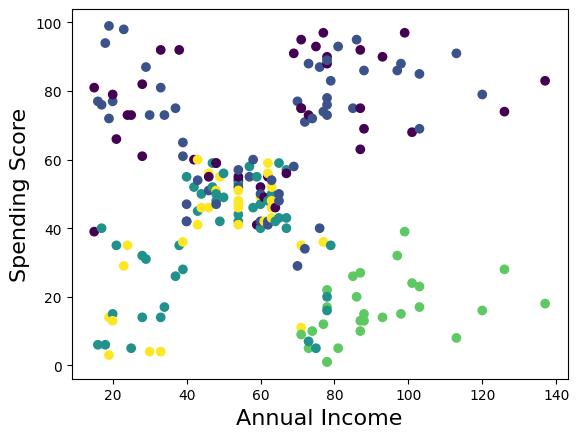

In [120]:
x= df['Annual Income (k$)']
y= df['Spending Score (1-100)']
plt.xlabel('Annual Income', fontsize=16)
plt.ylabel('Spending Score', fontsize=16)
plt.scatter(x,y,c=k_means.labels_)

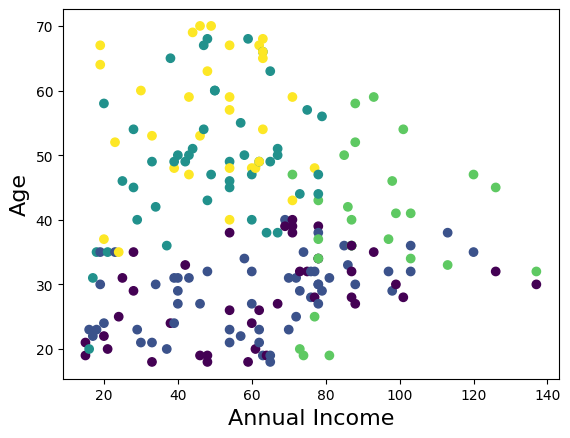

In [121]:
x= df['Annual Income (k$)']
y= df['Age']
plt.xlabel('Annual Income', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.scatter(x,y,c=k_means.labels_)

In [122]:
df.groupby('Clus_km').mean()

CustomerID   Gender        Age  Annual Income (k$)  \
Clus_km                                                       
0        103.375000  1.00000  28.250000           62.000000   
1        101.910714  0.00000  28.392857           60.428571   
2         73.956522  0.00000  49.043478           48.913043   
3        170.555556  0.62963  39.296296           92.074074   
4         72.612903  1.00000  55.903226           48.774194   

         Spending Score (1-100)  
Clus_km                          
0                     71.675000  
1                     68.178571  
2                     37.217391  
3                     16.296296  
4                     38.806452

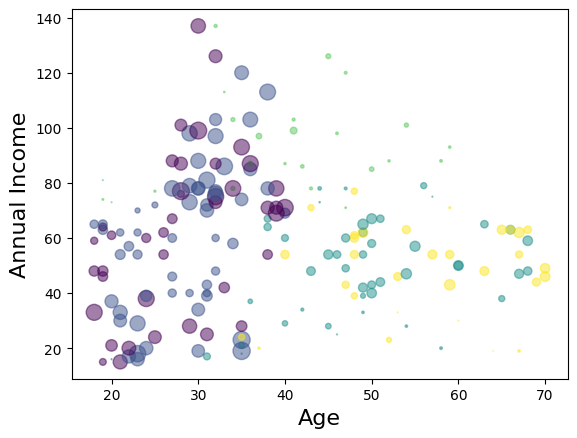

In [123]:
area = (np.pi * ( X[:, 3])**2) /200
plt.scatter(X[:, 1], X[:, 2], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Annual Income', fontsize=16)

plt.show()


In [124]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 2, 1, 2, 1, 2, 1, 4, 1, 4, 1, 2, 1, 4, 0, 2, 0, 4, 1, 4, 0,
       2, 0, 2, 0, 2, 0, 2, 1, 4, 1, 4, 0, 2, 1, 2, 1, 2, 1, 2, 0, 4, 1,
       2, 1, 2, 1, 1, 1, 2, 0, 1, 4, 2, 4, 2, 4, 1, 4, 4, 0, 2, 2, 4, 0,
       2, 2, 0, 1, 4, 2, 2, 2, 4, 0, 2, 4, 1, 2, 4, 0, 4, 2, 1, 4, 2, 1,
       1, 2, 2, 0, 4, 2, 1, 0, 2, 1, 4, 0, 1, 2, 4, 0, 4, 1, 2, 4, 4, 4,
       4, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 4, 0, 4, 0, 3, 0,
       1, 1, 3, 1, 2, 0, 3, 1, 2, 0, 1, 1, 3, 0, 4, 1, 3, 0, 3, 0, 2, 1,
       2, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 0])

In [125]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.12815215, -0.76072691,  0.05496398,  0.83369302],
       [-0.88640526, -0.75047453, -0.00501655,  0.6979562 ],
       [-0.88640526,  0.73155219, -0.44455768, -0.50400513],
       [ 0.38201978,  0.03202921,  1.20287422, -1.31619469],
       [ 1.12815215,  1.22385356, -0.4498575 , -0.44231533]])

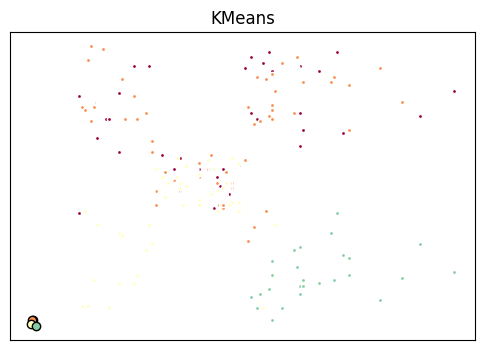

In [126]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(0,4), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 2], X[my_members, 3], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[2], cluster_center[3], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


# Hierarchical modeling

### Normalization

In [127]:
from sklearn.preprocessing import MinMaxScaler
x = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ,
        0.        ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653,
        0.        ],
       [0.01005025, 0.        , 0.03846154, 0.00819672, 0.05102041,
        0.5       ],
       [0.01507538, 0.        , 0.09615385, 0.00819672, 0.7755102 ,
        0.25      ],
       [0.0201005 , 0.        , 0.25      , 0.01639344, 0.39795918,
        0.5       ]])

### Clustering using Scipy

In [128]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

C:\Users\ASuS\AppData\Local\Temp\ipykernel_10688\458117257.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


array([[0.        , 0.43032315, 1.1678734 , ..., 1.41345435, 1.6312245 ,
        1.49877657],
       [0.43032315, 0.        , 1.35504824, ..., 1.35931186, 1.73219928,
        1.42138915],
       [1.1678734 , 1.35504824, 0.        , ..., 1.88623356, 1.75627402,
        1.96672404],
       ...,
       [1.41345435, 1.35931186, 1.88623356, ..., 0.        , 0.94719871,
        0.13469899],
       [1.6312245 , 1.73219928, 1.75627402, ..., 0.94719871, 0.        ,
        1.00196078],
       [1.49877657, 1.42138915, 1.96672404, ..., 0.13469899, 1.00196078,
        0.        ]])

In [129]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

C:\Users\ASuS\AppData\Local\Temp\ipykernel_10688\227076933.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [130]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([17, 17,  8,  5,  6,  5,  8,  5, 24,  5, 24,  5,  7,  5, 23, 17,  6,
       17, 23,  5, 23, 17,  7, 17,  7, 17,  6, 19,  6,  5, 24,  5, 24, 17,
        6,  5,  6,  9,  6,  5, 11, 17, 27,  9,  6,  9, 13,  9,  9,  9, 13,
       19,  9, 27, 13, 27, 13, 26,  9, 27, 26, 19, 11, 13, 27, 19, 13, 11,
       19,  9, 26, 13, 13, 13, 27, 18, 13, 27, 10, 13, 27, 18, 26, 13, 10,
       27, 13, 10, 10, 12, 11, 18, 27, 12, 10, 18, 12, 10, 27, 18, 10, 12,
       26, 18, 27, 10, 11, 27, 26, 26, 26, 10, 12, 18, 10, 10, 11, 12, 12,
       12, 18, 12, 10, 15, 10,  4, 25, 15, 25, 15, 22, 15, 10,  4, 21,  4,
        1, 15, 21,  4,  1, 15, 10,  4, 21, 15, 25,  4,  1, 15, 22, 15,  1,
        4,  1,  4, 22,  4, 22,  4,  1,  4, 21,  4, 22,  4, 22,  4,  1, 16,
       22, 16, 22, 16,  2,  4, 22, 16, 22, 16,  2,  3, 22,  3,  2, 16,  2,
       16,  2,  3,  2,  3, 20,  3,  2,  3,  2, 14, 20, 14], dtype=int32)

In [131]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([4, 4, 2, 2, 2, 2, 2, 2, 5, 2, 5, 2, 2, 2, 5, 4, 2, 4, 5, 2, 5, 4,
       2, 4, 2, 4, 2, 4, 2, 2, 5, 2, 5, 4, 2, 2, 2, 3, 2, 2, 3, 4, 5, 3,
       2, 3, 3, 3, 3, 3, 3, 4, 3, 5, 3, 5, 3, 5, 3, 5, 5, 4, 3, 3, 5, 4,
       3, 3, 4, 3, 5, 3, 3, 3, 5, 4, 3, 5, 3, 3, 5, 4, 5, 3, 3, 5, 3, 3,
       3, 3, 3, 4, 5, 3, 3, 4, 3, 3, 5, 4, 3, 3, 5, 4, 5, 3, 3, 5, 5, 5,
       5, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 1, 5, 4, 5, 4, 5, 4,
       3, 1, 5, 1, 1, 4, 5, 1, 1, 4, 3, 1, 5, 4, 5, 1, 1, 4, 5, 4, 1, 1,
       1, 1, 5, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 1, 1, 4, 5, 4, 5, 4, 1, 1,
       5, 4, 5, 4, 1, 1, 5, 1, 1, 4, 1, 4, 1, 1, 1, 1, 5, 1, 1, 1, 1, 4,
       5, 4], dtype=int32)

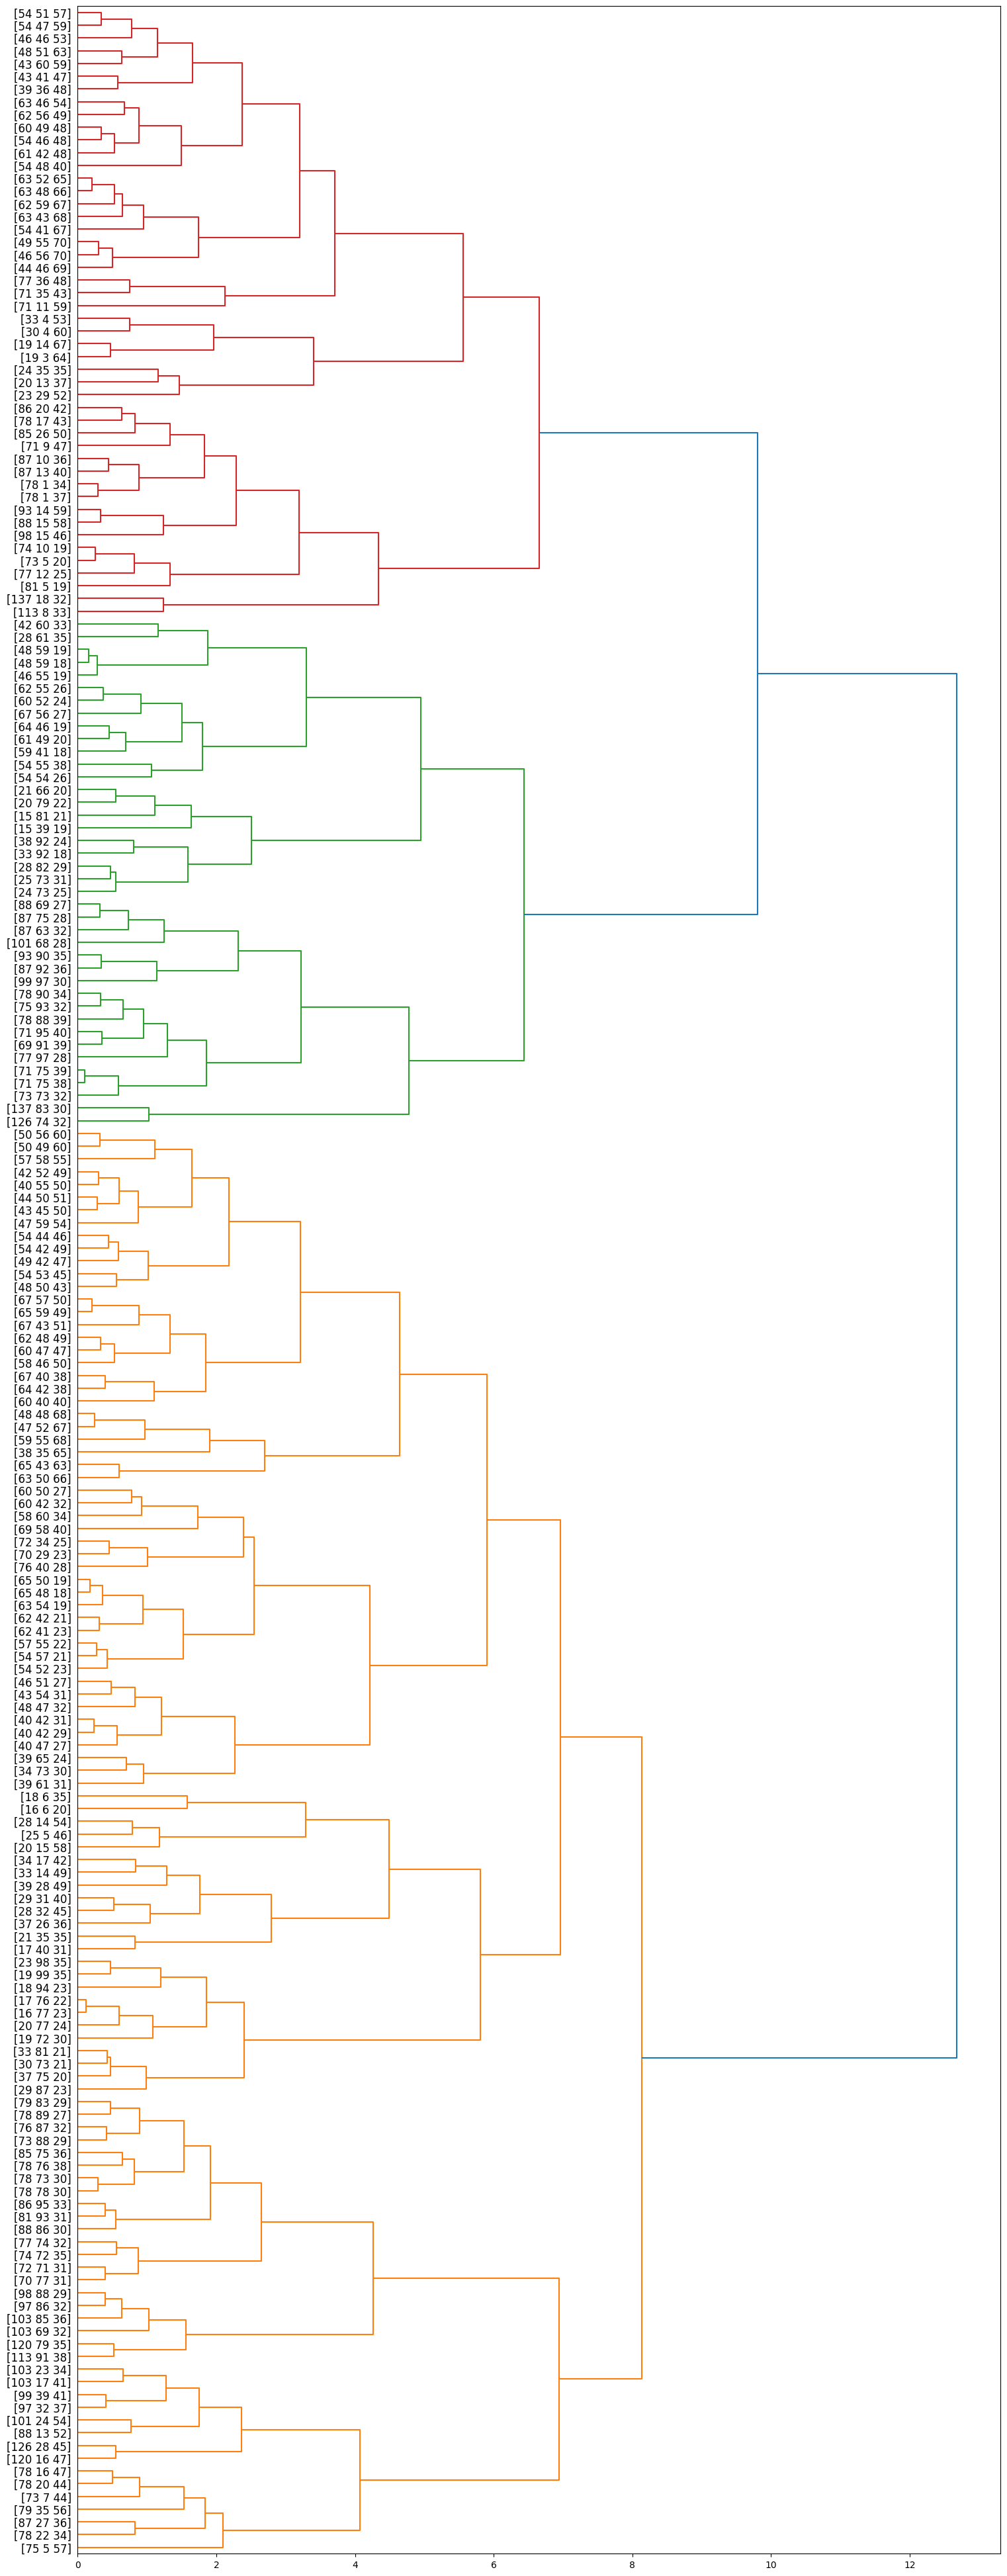

In [132]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Annual Income (k$)'][id], df['Spending Score (1-100)'][id], int(float(df['Age'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### Clustering using scikit-learn

In [133]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.43032315 1.1678734  ... 1.41345435 1.6312245  1.49877657]
 [0.43032315 0.         1.35504824 ... 1.35931186 1.73219928 1.42138915]
 [1.1678734  1.35504824 0.         ... 1.88623356 1.75627402 1.96672404]
 ...
 [1.41345435 1.35931186 1.88623356 ... 0.         0.94719871 0.13469899]
 [1.6312245  1.73219928 1.75627402 ... 0.94719871 0.         1.00196078]
 [1.49877657 1.42138915 1.96672404 ... 0.13469899 1.00196078 0.        ]]


In [134]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\ASuS\AppData\Local\Temp\ipykernel_10688\1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


In [135]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:566: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([2, 2, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 1, 2, 4, 2, 1, 4, 1, 2,
       4, 2, 4, 2, 4, 2, 4, 4, 1, 4, 1, 2, 4, 4, 4, 3, 4, 4, 3, 2, 1, 3,
       4, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 3, 1, 2,
       3, 3, 2, 3, 1, 3, 3, 3, 1, 2, 3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 3, 3,
       3, 3, 3, 2, 1, 3, 3, 2, 3, 3, 1, 2, 3, 3, 1, 2, 1, 3, 3, 1, 1, 1,
       1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 2, 1, 2,
       3, 0, 1, 0, 0, 2, 1, 0, 0, 2, 3, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 2], dtype=int64)

#### We can add a new field to our dataframe to show the cluster of each row:


In [136]:
df['cluster_'] = agglom.labels_
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Clus_km  cluster_  
0        0         2  
1        0         2  
2        2         4  
3        1         4  
4        2         4

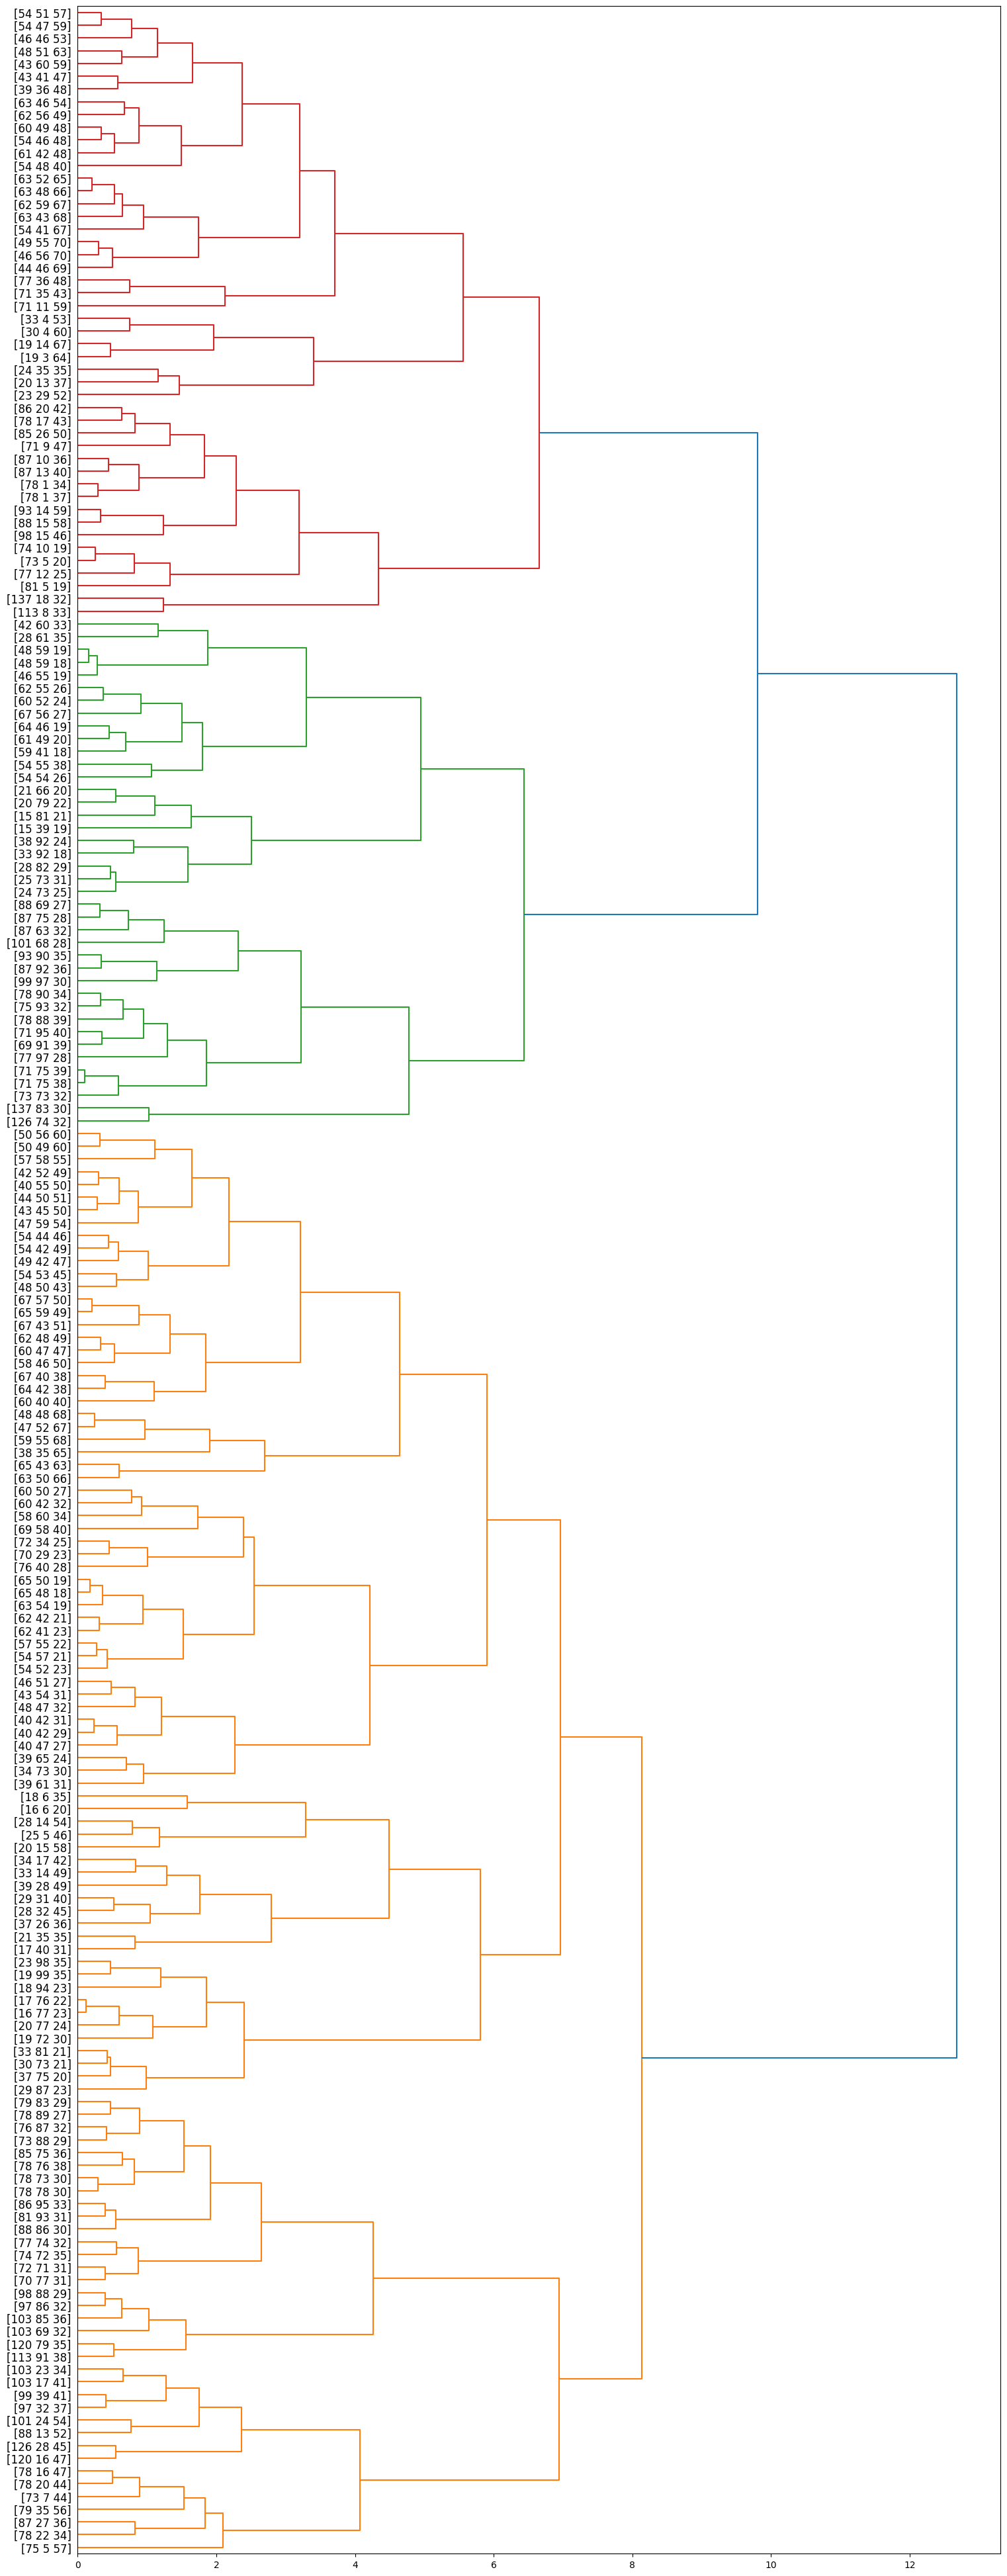

In [137]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Annual Income (k$)'][id], df['Spending Score (1-100)'][id], int(float(df['Age'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

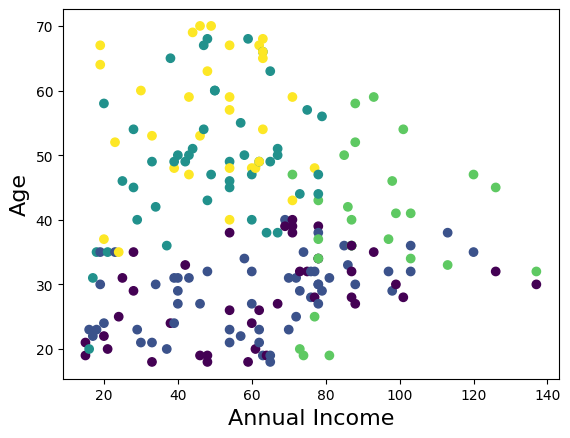

In [138]:
x= df['Annual Income (k$)']
y= df['Age']
plt.xlabel('Annual Income', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.scatter(x,y,c=k_means.labels_)

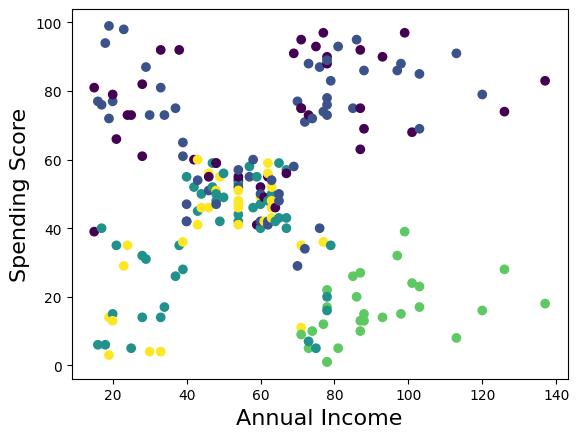

In [139]:
x= df['Annual Income (k$)']
y= df['Spending Score (1-100)']
plt.xlabel('Annual Income', fontsize=16)
plt.ylabel('Spending Score', fontsize=16)
plt.scatter(x,y,c=k_means.labels_)

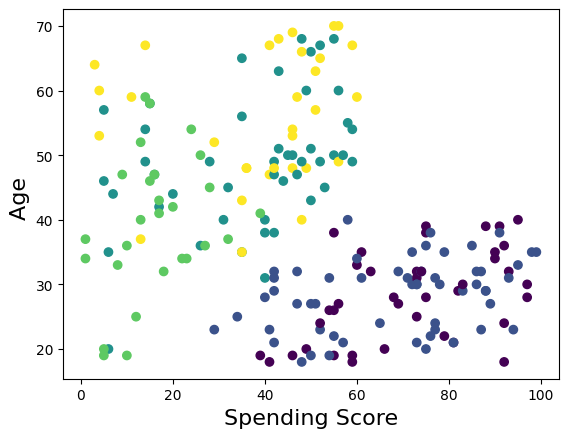

In [140]:
x= df['Spending Score (1-100)']
y= df['Age']
plt.xlabel('Spending Score', fontsize=16)
plt.ylabel('Age ', fontsize=16)
plt.scatter(x,y,c=k_means.labels_)

C:\Users\ASuS\AppData\Local\Temp\ipykernel_10688\3761598607.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'], s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)
C:\Users\ASuS\AppData\Local\Temp\ipykernel_10688\3761598607.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['Annual Income (k$)'], subset['Spending Sc

Text(0, 0.5, 'Spending Score')

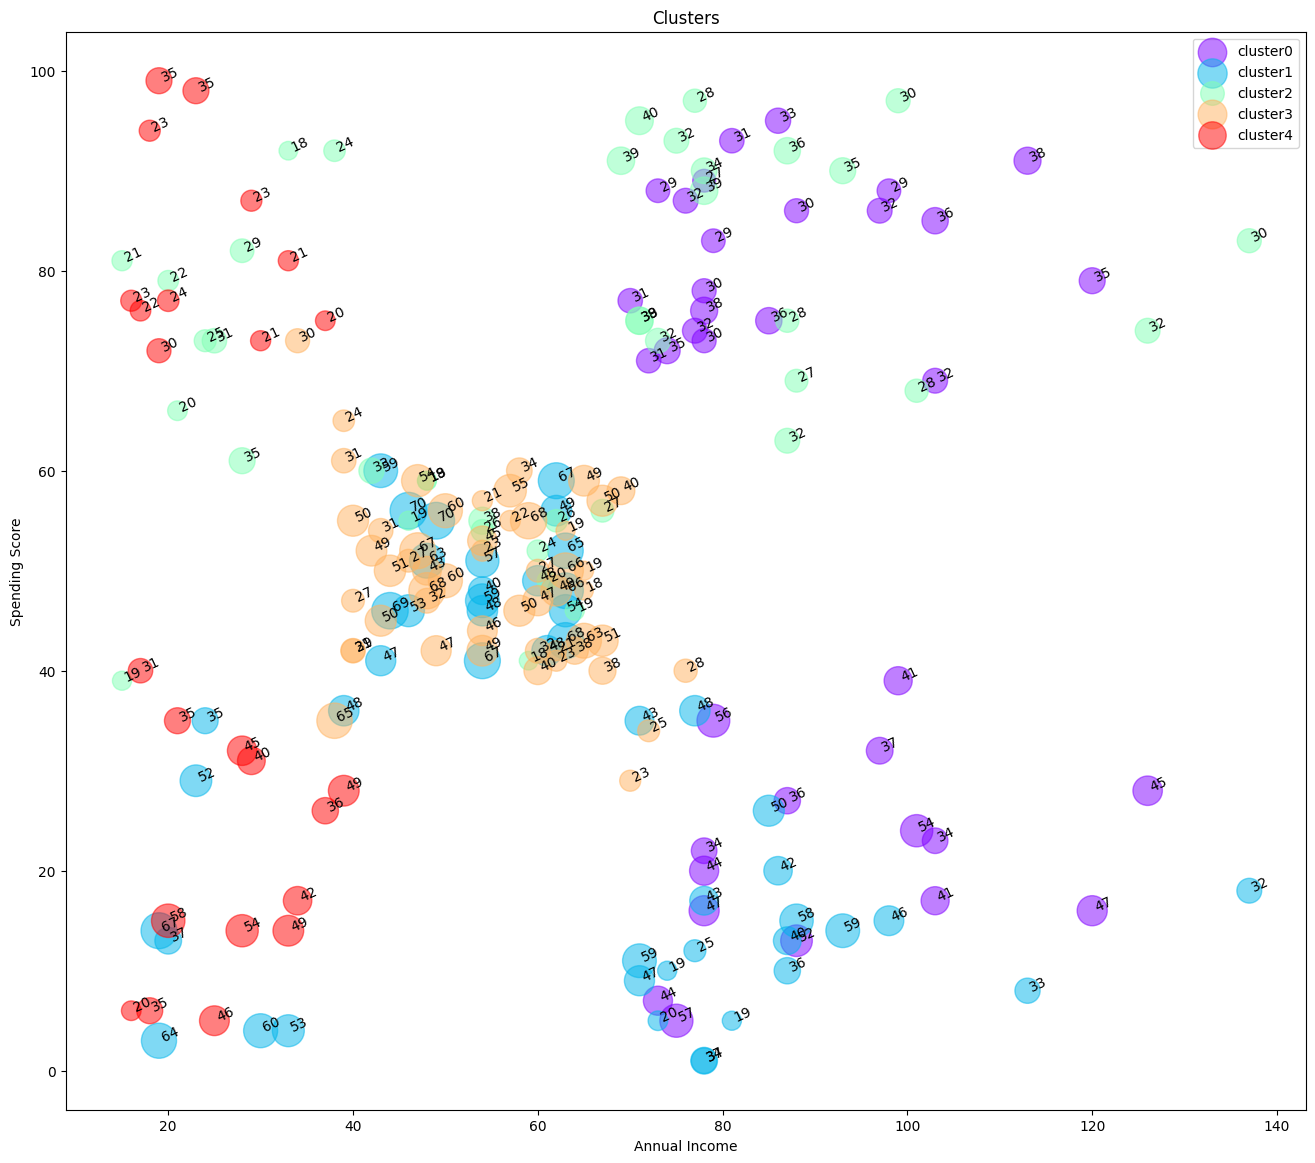

In [141]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset['Annual Income (k$)'][i], subset['Spending Score (1-100)'][i],str(subset['Age'][i]), rotation=25) 
    plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'], s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [142]:
df.groupby(['cluster_','Gender'])['cluster_'].count()

cluster_  Gender
0         0         36
1         1         48
2         1         40
3         0         52
4         0         24
Name: cluster_, dtype: int64

In [143]:
agg = df.groupby(['cluster_','Gender'])['Annual Income (k$)'].mean()
agg

cluster_  Gender
0         0         88.666667
1         1         62.416667
2         1         62.000000
3         0         54.576923
4         0         25.250000
Name: Annual Income (k$), dtype: float64

# Density-Based Clustering

In [144]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps =0.8 , min_samples =5).fit(Clus_dataSet)
dbscan.labels_
df['dbscan_labels']=dbscan.labels_

In [145]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Clus_km  cluster_  dbscan_labels  
0        0         2             -1  
1        0         2              0  
2        2         4             -1  
3        1         4              1  
4        2         4              1

In [146]:
dbscan_labels = dbscan.labels_
dbscan.labels_

array([-1,  0, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  0,  1,
        0,  2, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  1,  2,  1,  2,  1,  2,  1,  2,  2,  3,  1,  1,  2,  3,  1,  1,
        3,  1,  2,  1,  1,  1,  2,  3,  1,  2,  1,  1,  2,  2,  2,  1,  1,
        2,  1,  1,  1,  1,  1,  3,  2,  1,  1,  3,  1,  1,  2,  3,  1,  1,
        2,  3,  2,  1,  1,  2,  2,  2,  2,  1,  1,  3,  1,  1,  1,  1,  1,
        1,  3,  1,  1,  3,  1,  1,  2,  3, -1,  3,  2,  3,  1,  1,  2,  1,
        4,  3,  2,  1,  4,  3,  1,  1,  2,  3,  2,  1,  4,  3,  2,  3,  4,
        1,  4,  1,  2,  1,  2,  1,  1,  1,  2,  1,  2,  1,  2,  1,  4,  3,
        2,  3,  2,  3,  4,  1,  2,  3, -1,  3,  4,  1,  2,  1,  4,  3,  4,
        3,  4,  1,  4,  1, -1,  1, -1,  1, -1, -1, -1, -1], dtype=int64)

In [147]:
DBSCAN_ = df.groupby(['dbscan_labels','Gender'])['Spending Score (1-100)'].mean()
DBSCAN_

dbscan_labels  Gender
-1             0         42.166667
               1         24.615385
 0             1         77.666667
 1             0         56.095745
 2             1         34.825000
 3             1         71.423077
 4             0         20.416667
Name: Spending Score (1-100), dtype: float64

##  Insights

C:\Users\ASuS\AppData\Local\Temp\ipykernel_10688\1896052564.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'], s=subset['Age'][i]*100, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'Annual income')

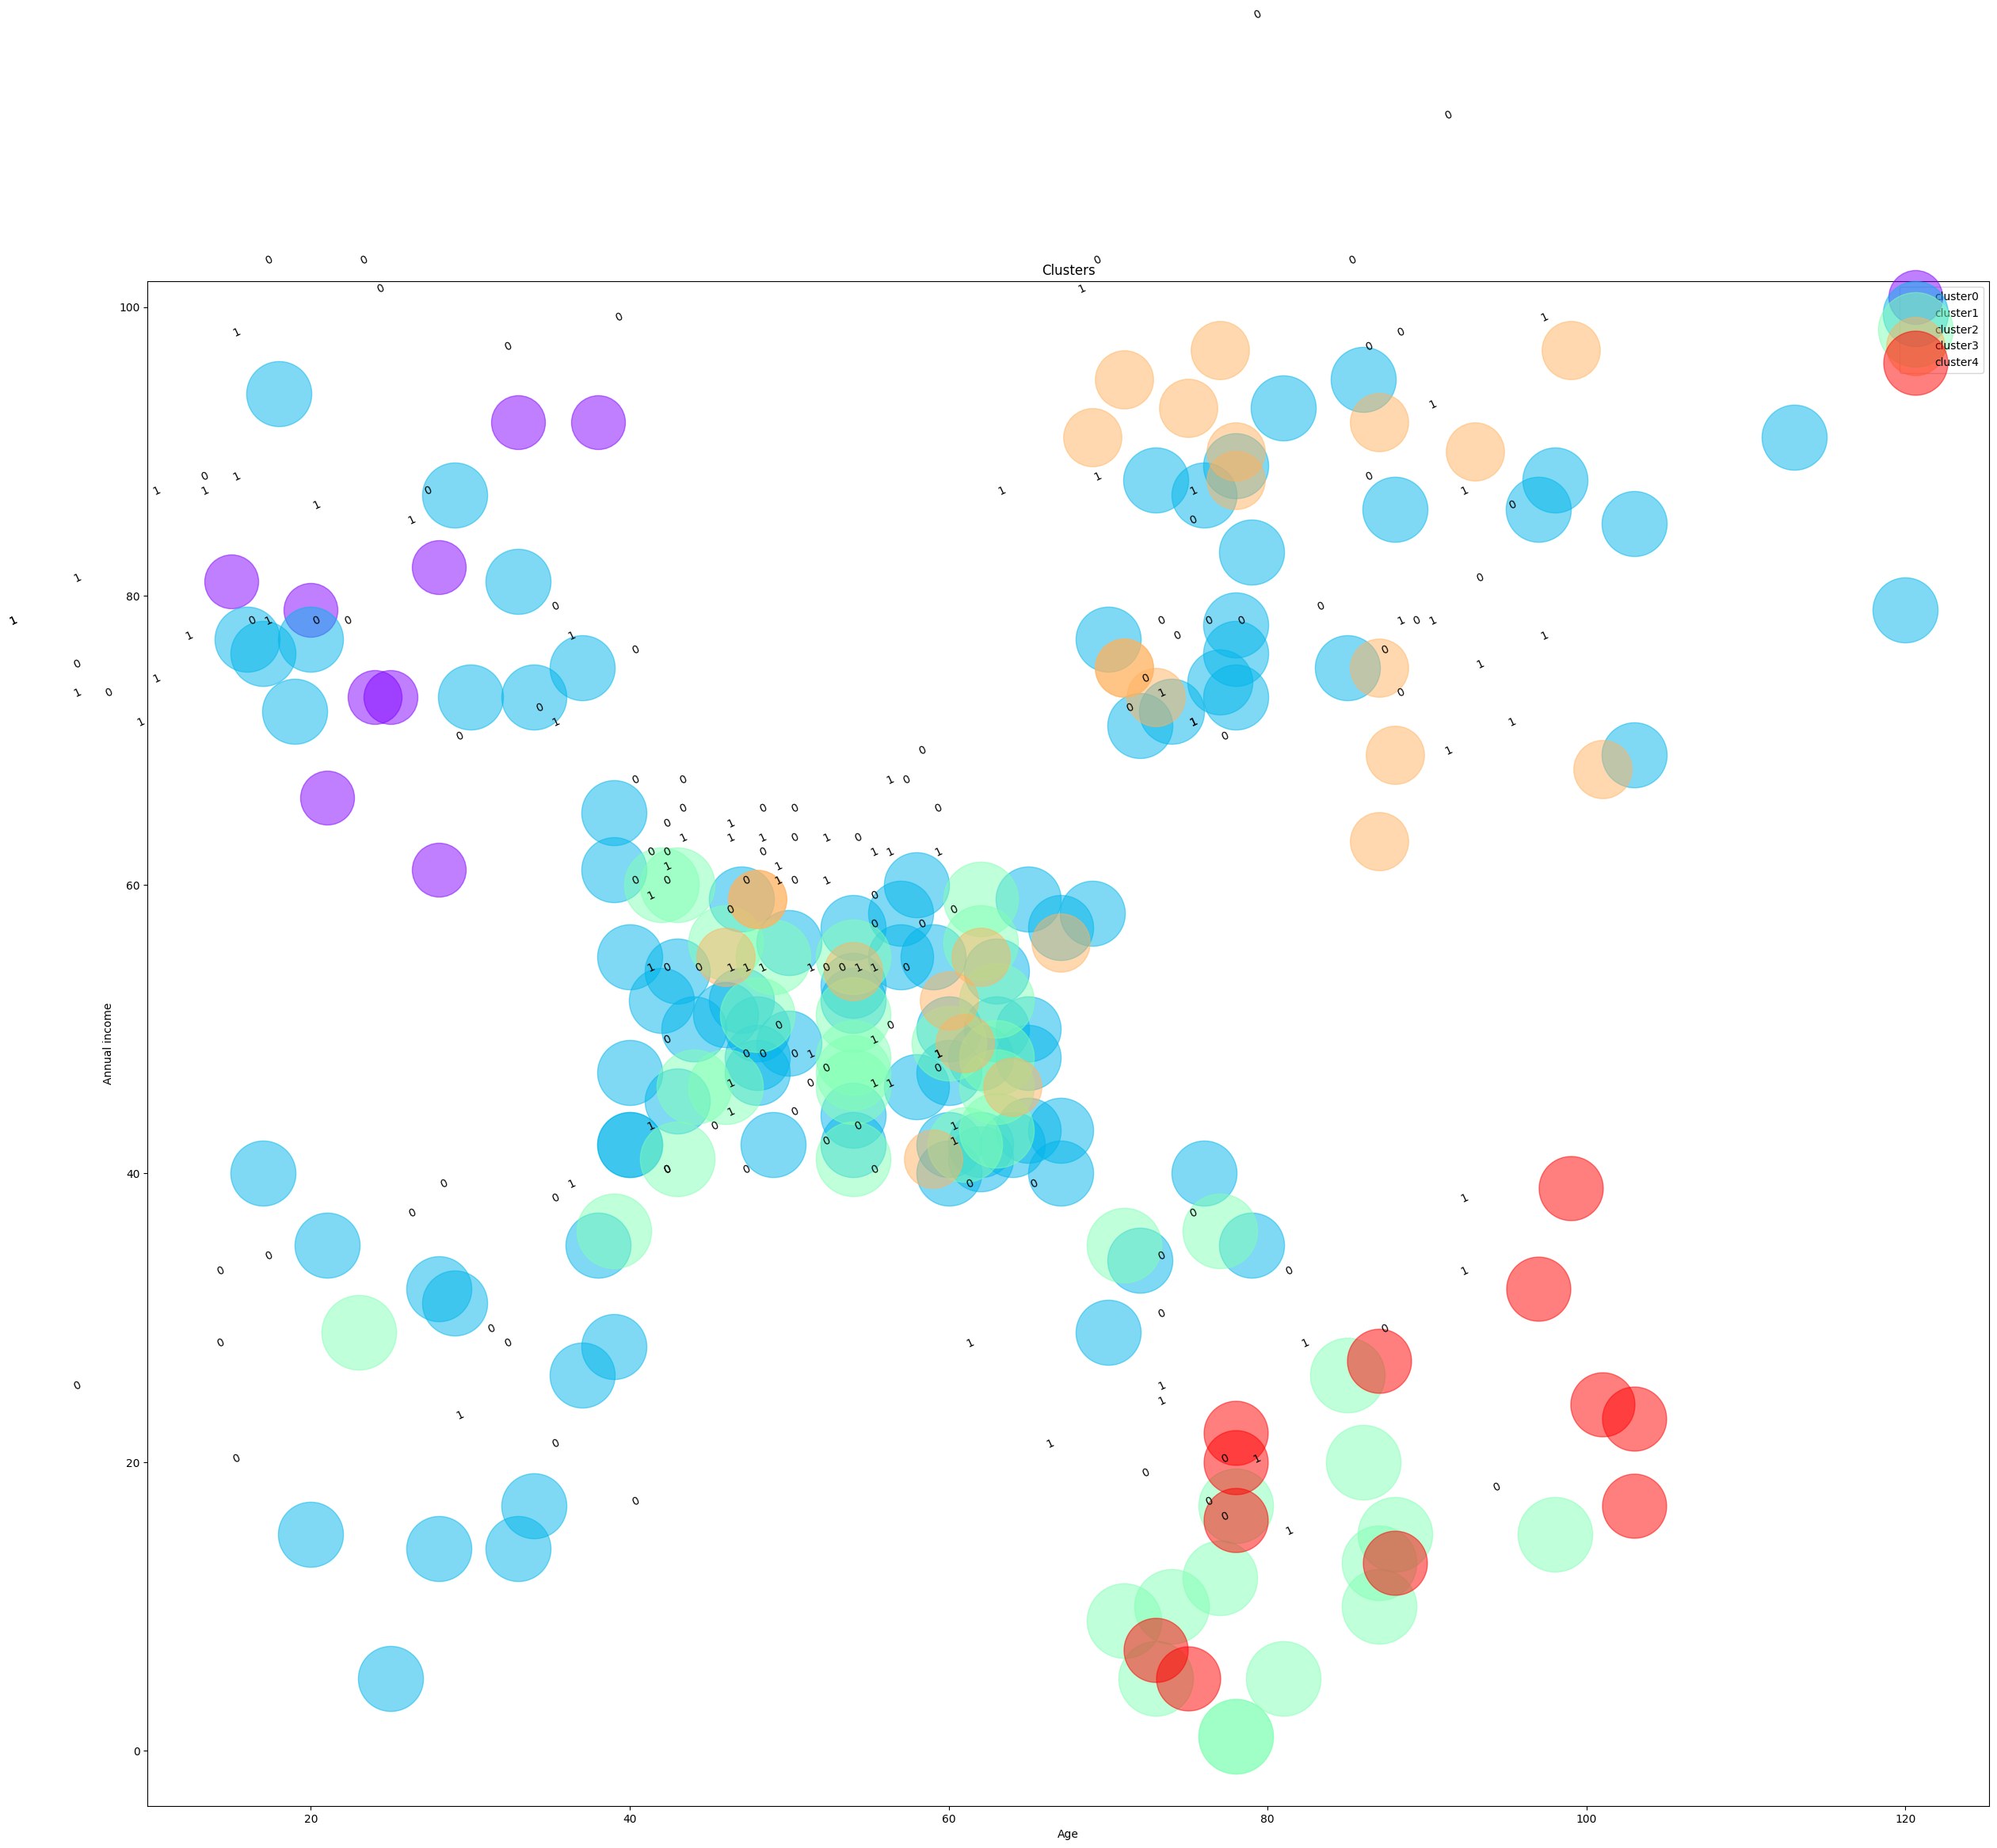

In [148]:
n_clusters = max(dbscan.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
plt.figure(figsize=(30,25))
for color, label in zip(colors, cluster_labels):
    subset = df[df.dbscan_labels == label]
    for i in subset.index:
         plt.text(subset['Spending Score (1-100)'][i], subset['Annual Income (k$)'][i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'], s=subset['Age'][i]*100, c=color, label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Annual income')

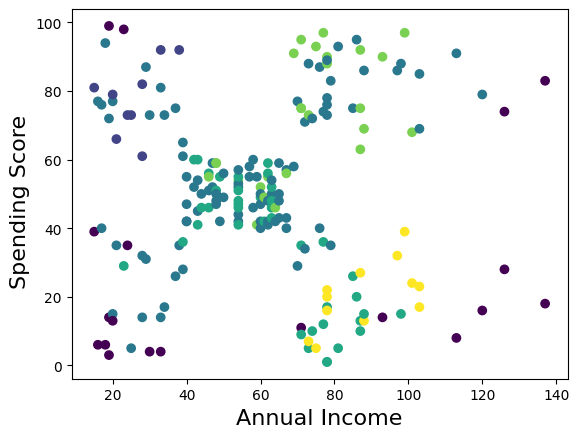

In [149]:
x= df['Annual Income (k$)']
y= df['Spending Score (1-100)']
plt.xlabel('Annual Income', fontsize=16)
plt.ylabel('Spending Score  ', fontsize=16)
plt.scatter(x,y,c=dbscan.labels_)

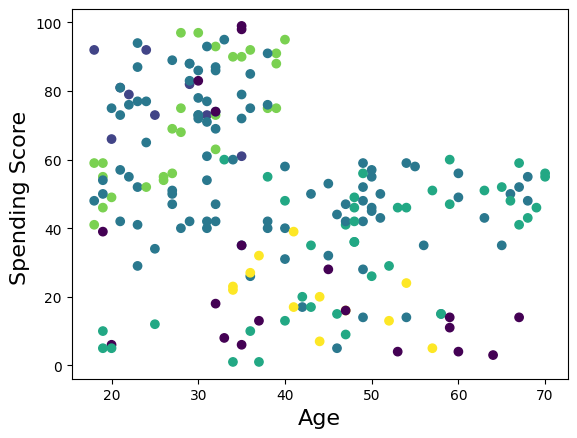

In [150]:
x= df['Age']
y= df['Spending Score (1-100)']
plt.xlabel('Age', fontsize=16)
plt.ylabel('Spending Score ', fontsize=16)
plt.scatter(x,y,c=dbscan.labels_)

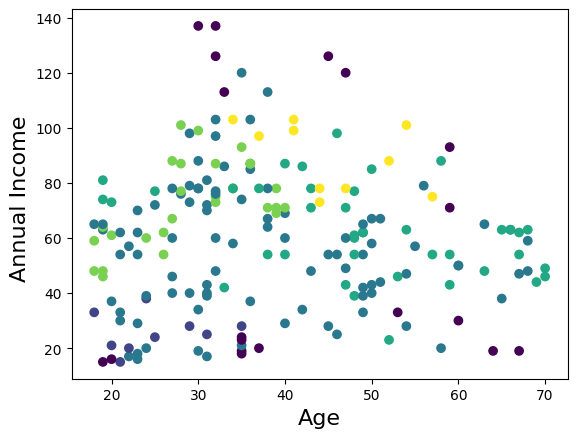

In [151]:
x= df['Age']
y= df['Annual Income (k$)']
plt.xlabel('Age', fontsize=16)
plt.ylabel('Annual Income ', fontsize=16)
plt.scatter(x,y,c=dbscan.labels_)

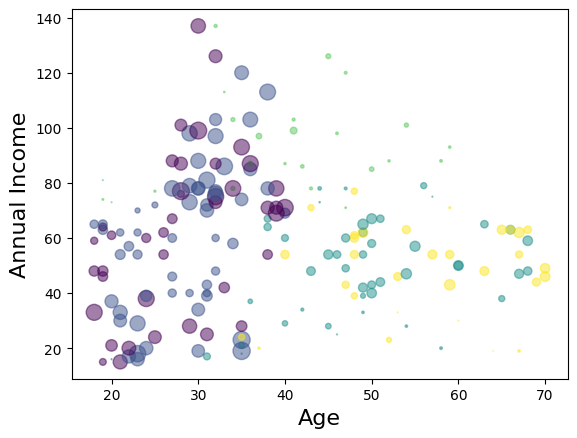

In [152]:
area = (np.pi * ( X[:, 3])**2) /200
plt.scatter(X[:, 1], X[:, 2], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Annual Income', fontsize=16)

plt.show()